### Introduction

In the rapidly evolving digital landscape, the entertainment industry, especially online streaming platforms, faces the challenge of enhancing user engagement and satisfaction. One of the pivotal strategies to achieve this is through personalized content delivery, where movie recommendation systems play a crucial role. These systems not only improve user experience by suggesting relevant content but also contribute to increased platform usage and customer loyalty.

The project at hand aims to develop a sophisticated movie recommendation system utilizing the MovieLens dataset. This system is designed to recommend movies to users based on their historical ratings, leveraging collaborative filtering techniques. By predicting user preferences with high accuracy, the system addresses the critical challenge of personalizing content in a crowded digital space.

#### Stakeholders

The primary stakeholders of this project include:

Online Streaming Platforms: Companies like Netflix, Amazon Prime Video, and Hulu can integrate this recommendation system to enhance user experience, increase viewer engagement, and reduce churn rates by providing tailored movie suggestions.
Users: Individual users of streaming services stand to benefit from a more personalized viewing experience, leading to improved satisfaction and discovery of new content aligned with their tastes.
Content Creators and Distributors: By promoting movies that are likely to be well-received, the system can help content creators and distributors reach their target audience more effectively, thereby increasing viewership and revenue from underexposed content.
Real-world Problem

The real-world problem addressed by this project is the challenge of content discovery in an age where users are overwhelmed by choices. In the vast sea of available movies and shows, it becomes increasingly difficult for users to find content that resonates with their preferences. This challenge, faced by online streaming platforms and their users, leads to decision fatigue, decreased user satisfaction, and potential loss of subscription revenue.

#### Project's Value

This project aims to solve this problem by developing a recommendation system that accurately predicts and suggests movies to users based on their preferences. By doing so, it significantly enhances the user experience, making content discovery seamless and personalized. For streaming platforms, this translates to increased user engagement, higher satisfaction levels, and reduced churn, ultimately contributing to their competitive edge and profitability.

### Conclusion

In conclusion, the movie recommendation system project addresses a significant real-world problem of content discovery in the digital entertainment industry. It offers substantial value to various stakeholders, including streaming platforms, users, and content creators, by providing a solution that enhances user engagement through personalized recommendations. The implications of this project extend beyond mere algorithmic sophistication, touching on the broader goal of making digital entertainment more accessible, enjoyable, and aligned with individual user preferences.


### Data Understanding

#### Data Sources

The dataset utilized in this project is the MovieLens dataset, curated by the GroupLens Research Lab at the University of Minnesota. This dataset is widely recognized in the machine learning community for building and testing recommendation systems. It comprises several files, but for the scope of this project, we focus on:

movies.csv: Contains movie information, including movie IDs, titles, and genres.

ratings.csv: Consists of user ratings for movies, crucial for collaborative filtering.

tags.csv: Includes user-generated tags for movies, which can be used for content-based filtering or enhancing collaborative filtering.

links.csv: Provides links to movie details on external sites like IMDb, which could be useful for gathering additional content information or metadata.

#### Dataset Size and Properties

The movies.csv file contains details for 9,742 movies, including their genres, which helps in content-based filtering and understanding user preferences.
The ratings.csv file is central to our recommendation system, comprising over 100,000 ratings from users, essential for understanding user preferences and implementing collaborative filtering.
Descriptive statistics for these datasets will provide insights into user rating behavior and movie popularity, guiding the model development process.
Relevance for the Project

The combination of ratings, movie information, and user-generated tags makes the MovieLens dataset particularly suitable for this project. The rich set of user ratings allows for the implementation of collaborative filtering techniques, which form the core of our recommendation system. Moreover, movie genres and tags offer an avenue for content-based filtering or hybrid models, enhancing the system's capability to make relevant recommendations, especially for new users or movies with fewer ratings (addressing the cold start problem).

#### Justification of Feature Inclusion

Movie Titles and Genres: Essential for identifying the content to recommend and for content-based filtering approaches.
User Ratings: The backbone of collaborative filtering, allowing the system to find and recommend movies liked by similar users.
Tags: Provide deeper insight into content, potentially improving recommendation quality by aligning suggestions with user's specific interests.


#### Limitations of the Data

Cold Start Problem:
New movies or users with few ratings pose a challenge, as there's limited data to base recommendations on.


Bias in User Ratings: 

Ratings are subjective and can be biased, affecting the system's ability to accurately predict preferences.


Sparsity of the Ratings Matrix:

With a large number of movies and users but relatively fewer ratings, the ratings matrix is sparse, which can complicate the modeling process.

#### Conclusion

The MovieLens dataset's comprehensive nature, combining user ratings, movie information, and tags, makes it exceptionally suited for developing a personalized movie recommendation system. Its widespread use in academic and research settings further attests to its reliability and relevance for addressing the real-world problem of improving content discovery and user engagement on streaming platforms. However, awareness of its limitations is crucial for developing robust and effective recommendation models.


### Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd                 # For working with dataframes
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

### Load Dataset

In [2]:
movies_df = pd.read_csv("../Data/movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", movies_df.shape[0])
print("Number of Columns:", movies_df.shape[1])

Dataset Shape:
Number of Rows: 9742
Number of Columns: 3


In [5]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(movies_df.dtypes)

Data Types of Columns:
movieId     int64
title      object
genres     object
dtype: object


###  `ratings.csv`


In [6]:
ratings_df = pd.read_csv('../Data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", ratings_df.shape[0])
print("Number of Columns:", ratings_df.shape[1])

Dataset Shape:
Number of Rows: 100836
Number of Columns: 4


In [9]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(ratings_df.dtypes)

Data Types of Columns:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [10]:
ratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,3.261276e+02,1.826185e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,100836.0,1.943530e+04,3.553099e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,100836.0,3.501557e+00,1.042529e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,100836.0,1.205946e+09,2.162610e+08,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09


### `tags.csv`

In [11]:
tags_df = pd.read_csv('../Data/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [13]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", tags_df.shape[0])
print("Number of Columns:", tags_df.shape[1])

Dataset Shape:
Number of Rows: 3683
Number of Columns: 4


In [14]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(tags_df.dtypes)

Data Types of Columns:
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


In [15]:
tags_df.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,3683.0,4.311493e+02,1.584726e+02,2.000000e+00,4.240000e+02,4.740000e+02,4.770000e+02,6.100000e+02
movieId,3683.0,2.725201e+04,4.349056e+04,1.000000e+00,1.262500e+03,4.454000e+03,3.926300e+04,1.935650e+05
timestamp,3683.0,1.320032e+09,1.721025e+08,1.137179e+09,1.137521e+09,1.269833e+09,1.498457e+09,1.537099e+09


### `links.csv`

In [16]:
links_df = pd.read_csv('../Data/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [17]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [18]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", links_df.shape[0])
print("Number of Columns:", links_df.shape[1])

Dataset Shape:
Number of Rows: 9742
Number of Columns: 3


In [19]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(links_df.dtypes)

Data Types of Columns:
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


### Data Cleaning and Preprocessing

In [20]:
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [21]:
# Dropping rows where 'tmdbId' is missing

links_df.dropna(subset=['tmdbId'], inplace=True)


In [22]:
# Check for duplicates in each dataframe
print(f"Duplicate entries in movies_df: {movies_df.duplicated().sum()}")
print(f"Duplicate entries in ratings_df: {ratings_df.duplicated().sum()}")
print(f"Duplicate entries in tags_df: {tags_df.duplicated().sum()}")
print(f"Duplicate entries in links_df: {links_df.duplicated().sum()}")


Duplicate entries in movies_df: 0
Duplicate entries in ratings_df: 0
Duplicate entries in tags_df: 0
Duplicate entries in links_df: 0


In [23]:
# Converting 'timestamp' in ratings_df to datetime format
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df.head()


,userId,movieId,rating,timestamp,datetime
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51


In [24]:
# Extracting year from the 'title' column in movies_df
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [25]:
movies_df["year"].value_counts()

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1917      1
1915      1
1919      1
1921      1
1908      1
Name: count, Length: 106, dtype: int64

### Merging 
Most import dataset for the analysis are movies_df & ratings_df

In [26]:
# Merge movies_df with ratings_df on the 'movieId' column
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

# Display the first few rows of the merged dataframe to verify the merge was successful
merged_df.head()


,movieId,title,genres,year,userId,rating,timestamp,datetime
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703,2000-07-30 18:45:03
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962,1996-11-08 06:36:02
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946,2005-01-25 06:52:26
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970,2017-11-13 12:59:30
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483,2011-05-18 05:28:03


In [27]:
# inspect the structure of the merged dataframe
print("\nMerged Dataset Shape:", merged_df.shape)
print("\nMerged Dataset Info:")
print(merged_df.info())


Merged Dataset Shape: (100836, 8)

Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   year       100818 non-null  object        
 4   userId     100836 non-null  int64         
 5   rating     100836 non-null  float64       
 6   timestamp  100836 non-null  int64         
 7   datetime   100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 6.2+ MB
None


In [28]:
merged_df.isna().sum()

movieId       0
title         0
genres        0
year         18
userId        0
rating        0
timestamp     0
datetime      0
dtype: int64

In [29]:
# Dropping rows where 'year' is missing in the merged_df
merged_df.dropna(subset=['year'], inplace=True)

# Verifying the rows have been dropped
print("New Dataset Shape:", merged_df.shape)
print("Missing 'year' values after correction:", merged_df['year'].isnull().sum())


New Dataset Shape: (100818, 8)
Missing 'year' values after correction: 0


In [30]:
# Identifying duplicate rows based on 'userId', 'movieId', and possibly 'rating'
# Assuming a combination of these columns should be unique for each rating entry
duplicates = merged_df.duplicated(subset=['userId', 'movieId', 'rating'], keep=False)

# Counting duplicates
duplicate_count = duplicates.sum()
print(f"Number of duplicate entries: {duplicate_count}")

# Optional: Display the duplicate rows to inspect them
if duplicate_count > 0:
    display(merged_df[duplicates])


Number of duplicate entries: 0


In [31]:
# droppping unnecessary columns

merged_df.drop(columns=['timestamp', 'datetime'], inplace=True)


In [32]:
merged_df.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5


In [33]:
merged_df['movieId'].value_counts()


movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
27816       1
27826       1
27829       1
27830       1
193609      1
Name: count, Length: 9711, dtype: int64

In [34]:
# subseting on most popular movies

In [35]:
# subseting on most popular movies
# Calculate the number of ratings per movie
ratings_count = merged_df['movieId'].value_counts()

# Find the threshold for the top 10%
threshold = ratings_count.quantile(0.9)

# Filter the movies that have more ratings than the threshold
top_movies_ids = ratings_count[ratings_count > threshold].index
top_movies_df = merged_df[merged_df['movieId'].isin(top_movies_ids)]


In [36]:
top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59471 entries, 0 to 99744
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  59471 non-null  int64  
 1   title    59471 non-null  object 
 2   genres   59471 non-null  object 
 3   year     59471 non-null  object 
 4   userId   59471 non-null  int64  
 5   rating   59471 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


### checking for outliers

In [37]:
# Check for outliers (assuming numeric columns)
numeric_columns = top_movies_df.select_dtypes(include=[np.number]).columns
outliers = top_movies_df[numeric_columns].apply(lambda x: (x - x.mean()).abs() > 3 * x.std())
print("\nOutliers:\n", outliers.sum())


Outliers:
 movieId    1965
userId        0
rating      589
dtype: int64


In [38]:
from scipy import stats

# Calculate Z-scores for numeric columns
z_scores = stats.zscore(top_movies_df.select_dtypes(include=[np.number]))

# Identify outliers based on Z-scores (assuming a threshold of 3)
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Print the number of outliers
print("Number of outliers:", outliers.sum())


Number of outliers: 2528


In [39]:
top_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59471 entries, 0 to 99744
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  59471 non-null  int64  
 1   title    59471 non-null  object 
 2   genres   59471 non-null  object 
 3   year     59471 non-null  object 
 4   userId   59471 non-null  int64  
 5   rating   59471 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [40]:
from sklearn.preprocessing import MultiLabelBinarizer

# Assume `df` is your DataFrame and it has a 'genres' column with genres separated by "|"
top_movies_df['genres'] = top_movies_df['genres'].apply(lambda x: x.split('|'))

mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(top_movies_df['genres'])

In [41]:
genres_encoded

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [42]:
top_movies_df.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5


In [45]:
# Convert 'year' to integer for temporal analysis
top_movies_df['year'] = top_movies_df['year'].astype(int)

### EDA analysis

### Distribution of Ratings 



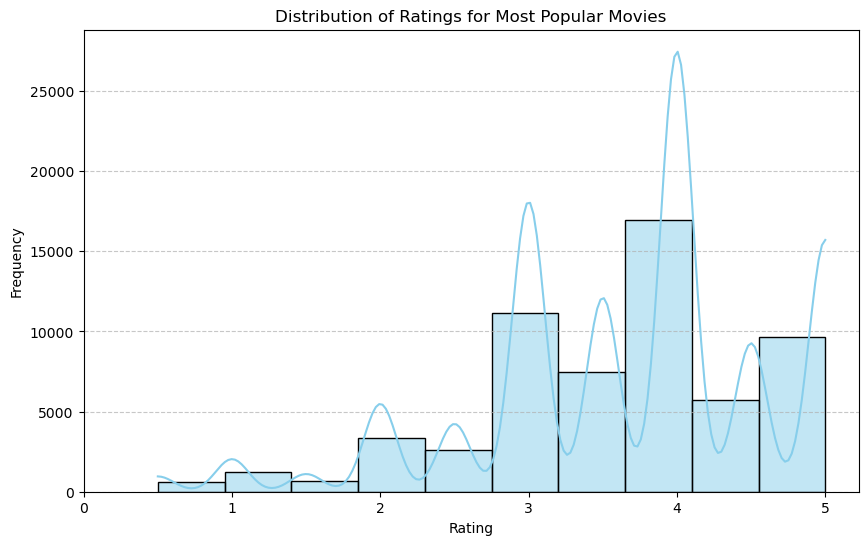

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the ratings in top_movies_df
plt.figure(figsize=(10, 6))
sns.histplot(data=top_movies_df, x='rating', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings for Most Popular Movies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(0, 6))  # Assuming ratings are on a 0-5 scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [1]:
# Split genres into individual genres
split_genres = top_movies_df['genres'].str.split('|', expand=True)

# Concatenate split genres with the original dataframe
top_movies_df_split = pd.concat([top_movies_df, split_genres], axis=1)

# Melt the dataframe to have each genre in a separate row
top_movies_df_melted = top_movies_df_split.melt(id_vars=top_movies_df.columns, value_vars=[0, 1, 2, 3, 4],
                                                var_name='genre_index', value_name='genre')

# Drop unnecessary columns and missing values
top_movies_df_melted.drop(columns=['genres', 'genre_index'], inplace=True)
top_movies_df_melted.dropna(subset=['genre'], inplace=True)

# Calculate average rating per genre
average_rating_per_genre = top_movies_df_melted.groupby('genre')['rating'].mean().sort_values(ascending=False).nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
average_rating_per_genre.plot(kind='bar', color='skyblue')
plt.title('Top Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


### distribution of Genres

In [2]:
from collections import Counter

# Split the genres for each movie and flatten the list
all_genres = sum(top_movies_df['genres'].apply(lambda x: x.split('|')).tolist(), [])

# Count each genre's occurrence
genre_counts = Counter(all_genres)

# Convert to a DataFrame for easier plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title('most popular Movie Genres')
plt.xlabel('Number of Occurrences')
plt.ylabel('Genre')
plt.show()


#### Trends in Movie Ratings Over the Years

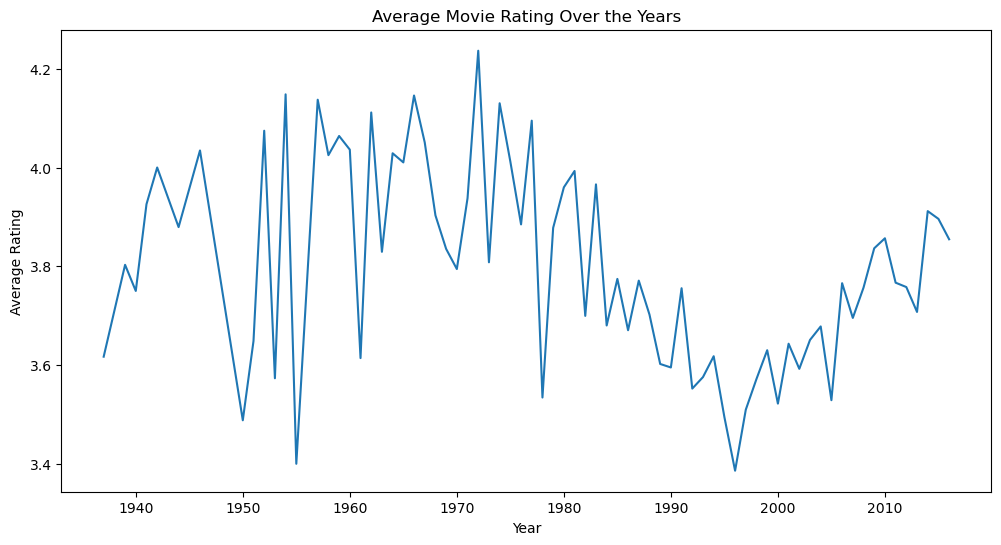

In [74]:
# Average rating per year
average_rating_per_year = top_movies_df.groupby('year')['rating'].mean()

# Plot
plt.figure(figsize=(12, 6))
average_rating_per_year.plot(kind='line')
plt.title('Average Movie Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


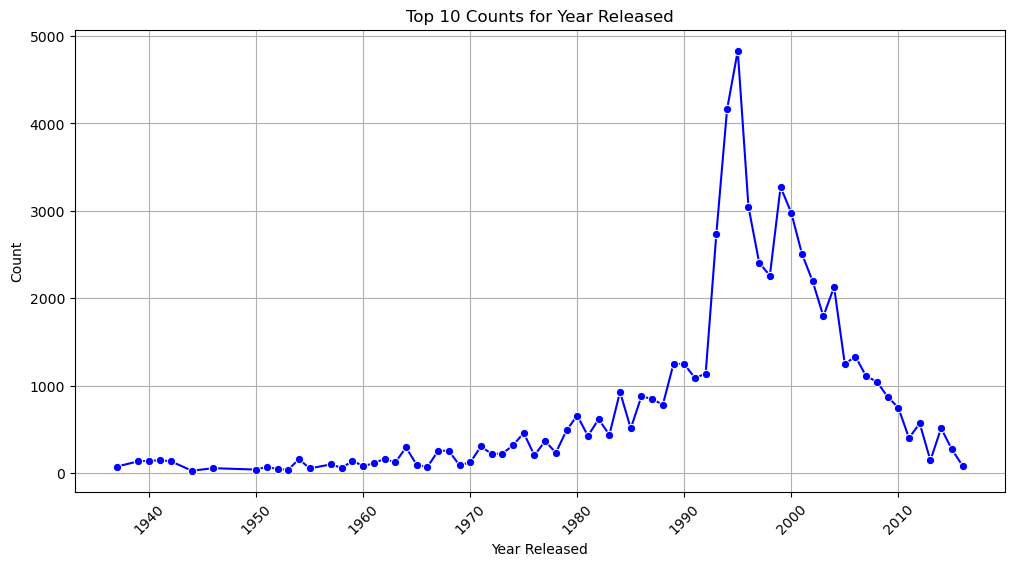

In [92]:
year_released_counts = top_movies_df['year'].value_counts()

# Plot the top counts for the year released
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_released_counts, marker='o', color='blue')
plt.title('Top 10 Counts for Year Released')
plt.xlabel('Year Released')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Collaborative Filtering

`Memory-Based CF:` The approach that relies on finding similarities between users or items to recommend similar items. It typically involves techniques such as Neighbourhood-based CF, where recommendations are made based on the preferences of similar users or items.

`Model-Based CF:` : This approach utilizes various data mining and machine learning algorithms to predict users' ratings or preferences for unrated items. One example of model-based CF is Principal Component Analysis (PCA), which helps identify the most significant components or features in the data and use them to make predictions.

### Memory-Based Collaborative Filtering (KNN)

### Baseline : KNN Basic model 

In [48]:
!pip install scikit-surprise


In [4]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy




# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(top_movies_df[['userId', 'movieId', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train and evaluate the KNN Basic model as the baseline
model_knn_basic = KNNBasic(random_state=1)
model_knn_basic.fit(trainset)

predictions_knn_basic = model_knn_basic.test(testset)
rmse_knn_basic = accuracy.rmse(predictions_knn_basic)
mae_knn_basic = accuracy.mae(predictions_knn_basic)

print("KNN Basic Model Evaluation:")
print("RMSE:", rmse_knn_basic)
print("MAE:", mae_knn_basic)

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'sim_options': {'name': ['cosine', 'pearson'],
                              'user_based': [True, False]}}

# Define the model
model = KNNBasic()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, measures=['rmse', 'mae'], cv=5)
grid_search.fit(data)

# Get the best RMSE score
print("Best RMSE score:", grid_search.best_score['rmse'])

# Get the best parameters
print("Best parameters:", grid_search.best_params['rmse'])

### model 2: KNN Baseline

In [ ]:
# Initialize the KNN Baseline model with a random state for reproducibility
model_knn_baseline = KNNBaseline(random_state=1)

# Train the KNN Baseline model on the training set
model_knn_baseline.fit(trainset)

# Generate predictions on the test set using the trained model
predictions_knn_baseline = model_knn_baseline.test(testset)

# Compute RMSE and MAE to evaluate the performance of the KNN Baseline model
rmse_knn_baseline = accuracy.rmse(predictions_knn_baseline)
mae_knn_baseline = accuracy.mae(predictions_knn_baseline)

# Print the evaluation results
print("KNN Baseline Model Evaluation:")
print("RMSE:", rmse_knn_baseline)
print("MAE:", mae_knn_baseline)


In [ ]:
from surprise.model_selection import cross_validate, GridSearchCV

# Step 1: Define the parameter grid for tuning
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [0.02, 0.04, 0.06],
                              'learning_rate': [0.005, 0.01, 0.015]},
              'k': [20, 30, 40],
              'sim_options': {'name': ['cosine', 'pearson'],
                              'user_based': [True, False]}}

# Step 2: Initialize the KNN Baseline model
model_knn_baseline = KNNBaseline(random_state=1)

# Step 3: Perform cross-validation to evaluate the model's performance
cv_results = cross_validate(model_knn_baseline, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Step 4: Print the cross-validation results
print("Cross-validation Results:")
for metric in ['test_rmse', 'test_mae']:
    print(f"{metric}: {cv_results[metric].mean()} (±{cv_results[metric].std()})")

# Step 5: Perform grid search to find the best parameters
grid_search = GridSearchCV(model_knn_baseline, param_grid, measures=['rmse'], cv=5, n_jobs=-1)
grid_search.fit(data)

# Step 6: Print the best RMSE score and corresponding parameters
print("Best RMSE score:", grid_search.best_score['rmse'])
print("Best parameters:", grid_search.best_params['rmse'])

# Step 7: Initialize the KNN Baseline model with the best parameters
best_params = grid_search.best_params['rmse']
model_knn_baseline_tuned = KNNBaseline(k=best_params['k'],
                                       bsl_options=best_params['bsl_options'],
                                       sim_options=best_params['sim_options'])

# Step 8: Fit the tuned model on the training data
model_knn_baseline_tuned.fit(trainset)

# Step 9: Generate predictions on the test set using the tuned model
predictions_knn_baseline_tuned = model_knn_baseline_tuned.test(testset)

# Step 10: Compute RMSE and MAE to evaluate the performance of the tuned model
rmse_knn_baseline_tuned = accuracy.rmse(predictions_knn_baseline_tuned)
mae_knn_baseline_tuned = accuracy.mae(predictions_knn_baseline_tuned)

# Step 11: Print the evaluation results for the tuned model
print("Tuned KNN Baseline Model Evaluation:")
print("RMSE:", rmse_knn_baseline_tuned)
print("MAE:", mae_knn_baseline_tuned)


### Model-Based Collaborative Filtering (SVD)

In [3]:
from surprise import SVD
# Instantiate the model (Singular Value Decomposition)
model = SVD(random_state=1)

# Fit the model on the training data
model.fit(trainset)


# Perform cross-validation
cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


# Print the cross-validation results
print("Cross-validation Results:")
for metric in ['test_rmse', 'test_mae']:
    print(f"{metric}: {cv_results[metric].mean()} (±{cv_results[metric].std()})")



In [ ]:
# Make predictions for the test set
predictions = model.test(testset)

# Evaluate the model performance (optional)
rmse_score=accuracy.rmse(predictions)

print("RMSE:", rmse_score)

### hyperparameter tuning

In [ ]:
from surprise.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {'n_factors': [50, 100, 150],
              'n_epochs': [20, 30, 40],
              'lr_all': [0.005, 0.01, 0.015],
              'reg_all': [0.02, 0.04, 0.06]}

# Instantiate the SVD model
model = SVD(random_state=1)

# Instantiate GridSearchCV
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(data)

# Print the best RMSE score and the corresponding parameters
print("Best RMSE score:", grid_search.best_score['rmse'])
print("Best parameters:", grid_search.best_params['rmse'])


In [ ]:
# Instantiate the SVD model with best hyperparameters
best_params = grid_search.best_params['rmse']
model = SVD(n_factors=best_params['n_factors'],
            n_epochs=best_params['n_epochs'],
            lr_all=best_params['lr_all'],
            reg_all=best_params['reg_all'])

# Fit the model on the training data
model.fit(trainset)

# Evaluate model performance
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print(f"RMSE: {rmse}, MAE: {mae}")


In [ ]:
# Generate recommendations for users
# Example: Use the model to predict ratings for unrated items for a specific user
user_id = 123
user_ratings = [(user_id, movie_id, 0) for movie_id in movie_ids]  # Initialize ratings for unrated movies
recommendations = model.test(user_ratings)
top_recommendations = sorted(recommendations, key=lambda x: x.est, reverse=True)[:10]  # Get top recommendations

### Non-Negative Matrix Factorization (NMF):

In [ ]:
# Instantiate the NMF model
model_nmf = NMF(random_state=1)

# Fit the model on the training data
model_nmf.fit(trainset)

# Make predictions on the test set
predictions_nmf = model_nmf.test(testset)

# Evaluate the model performance
rmse_nmf = accuracy.rmse(predictions_nmf)
mae_nmf = accuracy.mae(predictions_nmf)

print("NMF Model Evaluation:")
print("RMSE:", rmse_nmf)
print("MAE:", mae_nmf)


### Cold Start Problem:

For new users, a possible approach is to recommend popular or highly-rated movies from genres that are broadly appealing or trending.

For new items, leveraging item metadata (like genres) to find similar items based on content similarity can be effective.

Implementing a Basic Solution for New Users:

In [ ]:
def recommend_for_new_user(df, num_recommendations=5):
    """
    Recommend top N highly-rated movies for new users based on genres.
    """
    popular_movies = df.groupby(['title', 'genres'])['rating'].mean().reset_index()
    popular_movies = popular_movies.sort_values(by='rating', ascending=False)
    
    return popular_movies.head(num_recommendations)

# Example usage:
new_user_recommendations = recommend_for_new_user(merged_df)
print("Recommendations for a new user:\n", new_user_recommendations)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Preparing genres for TF-IDF vectorization
merged_df['cleaned_genres'] = merged_df['genres'].apply(lambda x: x.replace('|', ' '))

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_df['cleaned_genres'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations for a new item based on genres
def recommend_similar_items(new_item_id, title, cosine_sim=cosine_sim, num_recommendations=5):
    # Assuming 'title' is the title of the new item and its ID is 'new_item_id'
    # Adding the new item to the dataframe temporarily
    temp_df = merged_df.append({'movieId': new_item_id, 'title': title, 'cleaned_genres': ' '.join(title.split()[:-1])}, ignore_index=True)
    
    # Re-compute TF-IDF matrix and cosine similarity with the new item included
    tfidf_matrix = tfidf.fit_transform(temp_df['cleaned_genres'])
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    
    # Find similar items
    sim_scores = list(enumerate(cosine_sim[-1]))  # Assuming the new item is the last entry
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]  # Exclude the item itself
    item_indices = [i[0] for i in sim_scores]
    
    # Return the titles of similar items
    return temp_df['title'].iloc[item_indices]

# Example usage
# Assuming 'new_movie_id' and 'new_movie_title' are known
recommendations = recommend_similar_items(new_movie_id, new_movie_title)
print("Recommendations for a new item:\n", recommendations)
